In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

Імпортування даних

In [2]:
path = 'D:\\uni\\2курс\ПЗМН\ML_labs\lin_reg_task\survey_results_public.csv'
dataset = pd.read_csv(path)
dataset.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [3]:
dataset.tail()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
89179,89180,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89180,89181,I agree,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
89181,89182,I agree,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89182,89183,I agree,I am a developer by profession,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN
89183,89184,I agree,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,...,Never,1-2 times a week,1-2 times a week,60-120 minutes a day,30-60 minutes a day,DevOps function;Developer portal or other cent...,"Information Services, IT, Software Development...",Appropriate in length,Easy,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

Перевірка на NaN

In [5]:
dataset.isna().sum()

ResponseId                 0
Q120                       0
MainBranch                 0
Age                        0
Employment              1286
                       ...  
ProfessionalTech       47401
Industry               52410
SurveyLength            2699
SurveyEase              2630
ConvertedCompYearly    41165
Length: 84, dtype: int64

Створення окремого DataFrame, який я використовуватиму

In [6]:
df = dataset[['RemoteWork', 'DevType', 'EdLevel', 'LanguageHaveWorkedWith', 'WorkExp', 'Country', 'ConvertedCompYearly']].copy()
df.index = dataset.ResponseId
df = df.dropna()
df['EdLevel'] = df['EdLevel'].astype('category')
df.rename({'ConvertedCompYearly': 'Salary'}, axis=1, inplace=True)
df.head()

,RemoteWork,DevType,EdLevel,LanguageHaveWorkedWith,WorkExp,Country,Salary
ResponseId,,,,,,,
2,Remote,"Senior Executive (C-Suite, VP, etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",HTML/CSS;JavaScript;Python,10.0,United States of America,285000.0
3,"Hybrid (some remote, some in-person)","Developer, back-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Bash/Shell (all shells);Go,23.0,United States of America,250000.0
4,"Hybrid (some remote, some in-person)","Developer, front-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,7.0,United States of America,156000.0
5,Remote,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",HTML/CSS;JavaScript;TypeScript,6.0,Philippines,23456.0
6,Remote,"Developer, back-end",Some college/university study without earning ...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,22.0,United Kingdom of Great Britain and Northern I...,96828.0


In [7]:
df.describe()

,WorkExp,Salary
count,32554.000000,3.255400e+04
mean,11.435246,9.592970e+04
std,8.813607,4.339312e+05
min,0.000000,1.000000e+00
25%,5.000000,4.283600e+04
50%,9.000000,7.448300e+04
75%,16.000000,1.200000e+05
max,50.000000,7.435143e+07


Створенння списку з мовами

In [8]:
unique_languages = set(x.strip() for my_list in df['LanguageHaveWorkedWith'].dropna() for x in my_list.split(';'))
unique_languages

{'APL',
 'Ada',
 'Apex',
 'Assembly',
 'Bash/Shell (all shells)',
 'C',
 'C#',
 'C++',
 'Clojure',
 'Cobol',
 'Crystal',
 'Dart',
 'Delphi',
 'Elixir',
 'Erlang',
 'F#',
 'Flow',
 'Fortran',
 'GDScript',
 'Go',
 'Groovy',
 'HTML/CSS',
 'Haskell',
 'Java',
 'JavaScript',
 'Julia',
 'Kotlin',
 'Lisp',
 'Lua',
 'MATLAB',
 'Nim',
 'OCaml',
 'Objective-C',
 'PHP',
 'Perl',
 'PowerShell',
 'Prolog',
 'Python',
 'R',
 'Raku',
 'Ruby',
 'Rust',
 'SAS',
 'SQL',
 'Scala',
 'Solidity',
 'Swift',
 'TypeScript',
 'VBA',
 'Visual Basic (.Net)',
 'Zig'}

In [9]:
len(unique_languages)

51

Очищення даних від винятків у заробітній платі

In [10]:
# lim2 = np.abs((df.Salary - df.Salary.mean()) / df.Salary.std(ddof=0)) < 3
# df = df.where(lim2, np.nan)
# df = df.dropna()
# df.describe()

In [11]:
df.isna().sum()

RemoteWork                0
DevType                   0
EdLevel                   0
LanguageHaveWorkedWith    0
WorkExp                   0
Country                   0
Salary                    0
dtype: int64

Відокремлення заробітньої плати по знанням мов у новий Dataframe

In [12]:
df_sal = df.loc[:, ['LanguageHaveWorkedWith', 'Salary']].copy()
data_for_langue = pd.Series([[] for _ in range(len(unique_languages))], index=unique_languages)

for i in range(df_sal.shape[0]-1):
    curr_row = df_sal.iloc[i]
    for j in unique_languages:
        if j in curr_row['LanguageHaveWorkedWith']:
            data_for_langue.at[j].append(curr_row['Salary'])
        else:
            data_for_langue.at[j].append(pd.NA)

salary_per_langue = data_for_langue.to_frame(name="0")
salary_per_langue = salary_per_langue['0'].apply(pd.Series)
salary_per_langue["mean"] = salary_per_langue.mean(axis=1, skipna=True)
salary_per_langue["Language"] = [i for i in unique_languages]
salary_per_langue = salary_per_langue.sort_index(ascending=False)


In [13]:
salary_per_langue.T.head(10)

,Zig,Visual Basic (.Net),VBA,TypeScript,Swift,Solidity,Scala,SQL,SAS,Rust,...,Cobol,Clojure,C++,C#,C,Bash/Shell (all shells),Assembly,Apex,Ada,APL
0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,285000.0,<NA>,<NA>,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,250000.0,<NA>,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,156000.0,<NA>,<NA>,<NA>,156000.0,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,156000.0,156000.0,<NA>,<NA>,<NA>,<NA>
3,<NA>,<NA>,<NA>,23456.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,23456.0,<NA>,<NA>,<NA>,<NA>,<NA>
4,<NA>,<NA>,<NA>,96828.0,<NA>,<NA>,<NA>,96828.0,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,96828.0,96828.0,<NA>,<NA>,<NA>,<NA>
5,135000.0,<NA>,<NA>,135000.0,135000.0,<NA>,135000.0,<NA>,<NA>,<NA>,...,<NA>,135000.0,<NA>,<NA>,135000.0,<NA>,<NA>,<NA>,135000.0,<NA>
6,<NA>,<NA>,<NA>,80000.0,<NA>,<NA>,<NA>,80000.0,<NA>,80000.0,...,<NA>,<NA>,<NA>,<NA>,80000.0,<NA>,<NA>,<NA>,<NA>,<NA>
7,<NA>,<NA>,<NA>,75000.0,<NA>,75000.0,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,75000.0,75000.0,<NA>,<NA>,<NA>,<NA>
8,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,150000.0,...,<NA>,<NA>,150000.0,<NA>,150000.0,<NA>,<NA>,<NA>,<NA>,<NA>
9,<NA>,<NA>,<NA>,187407.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


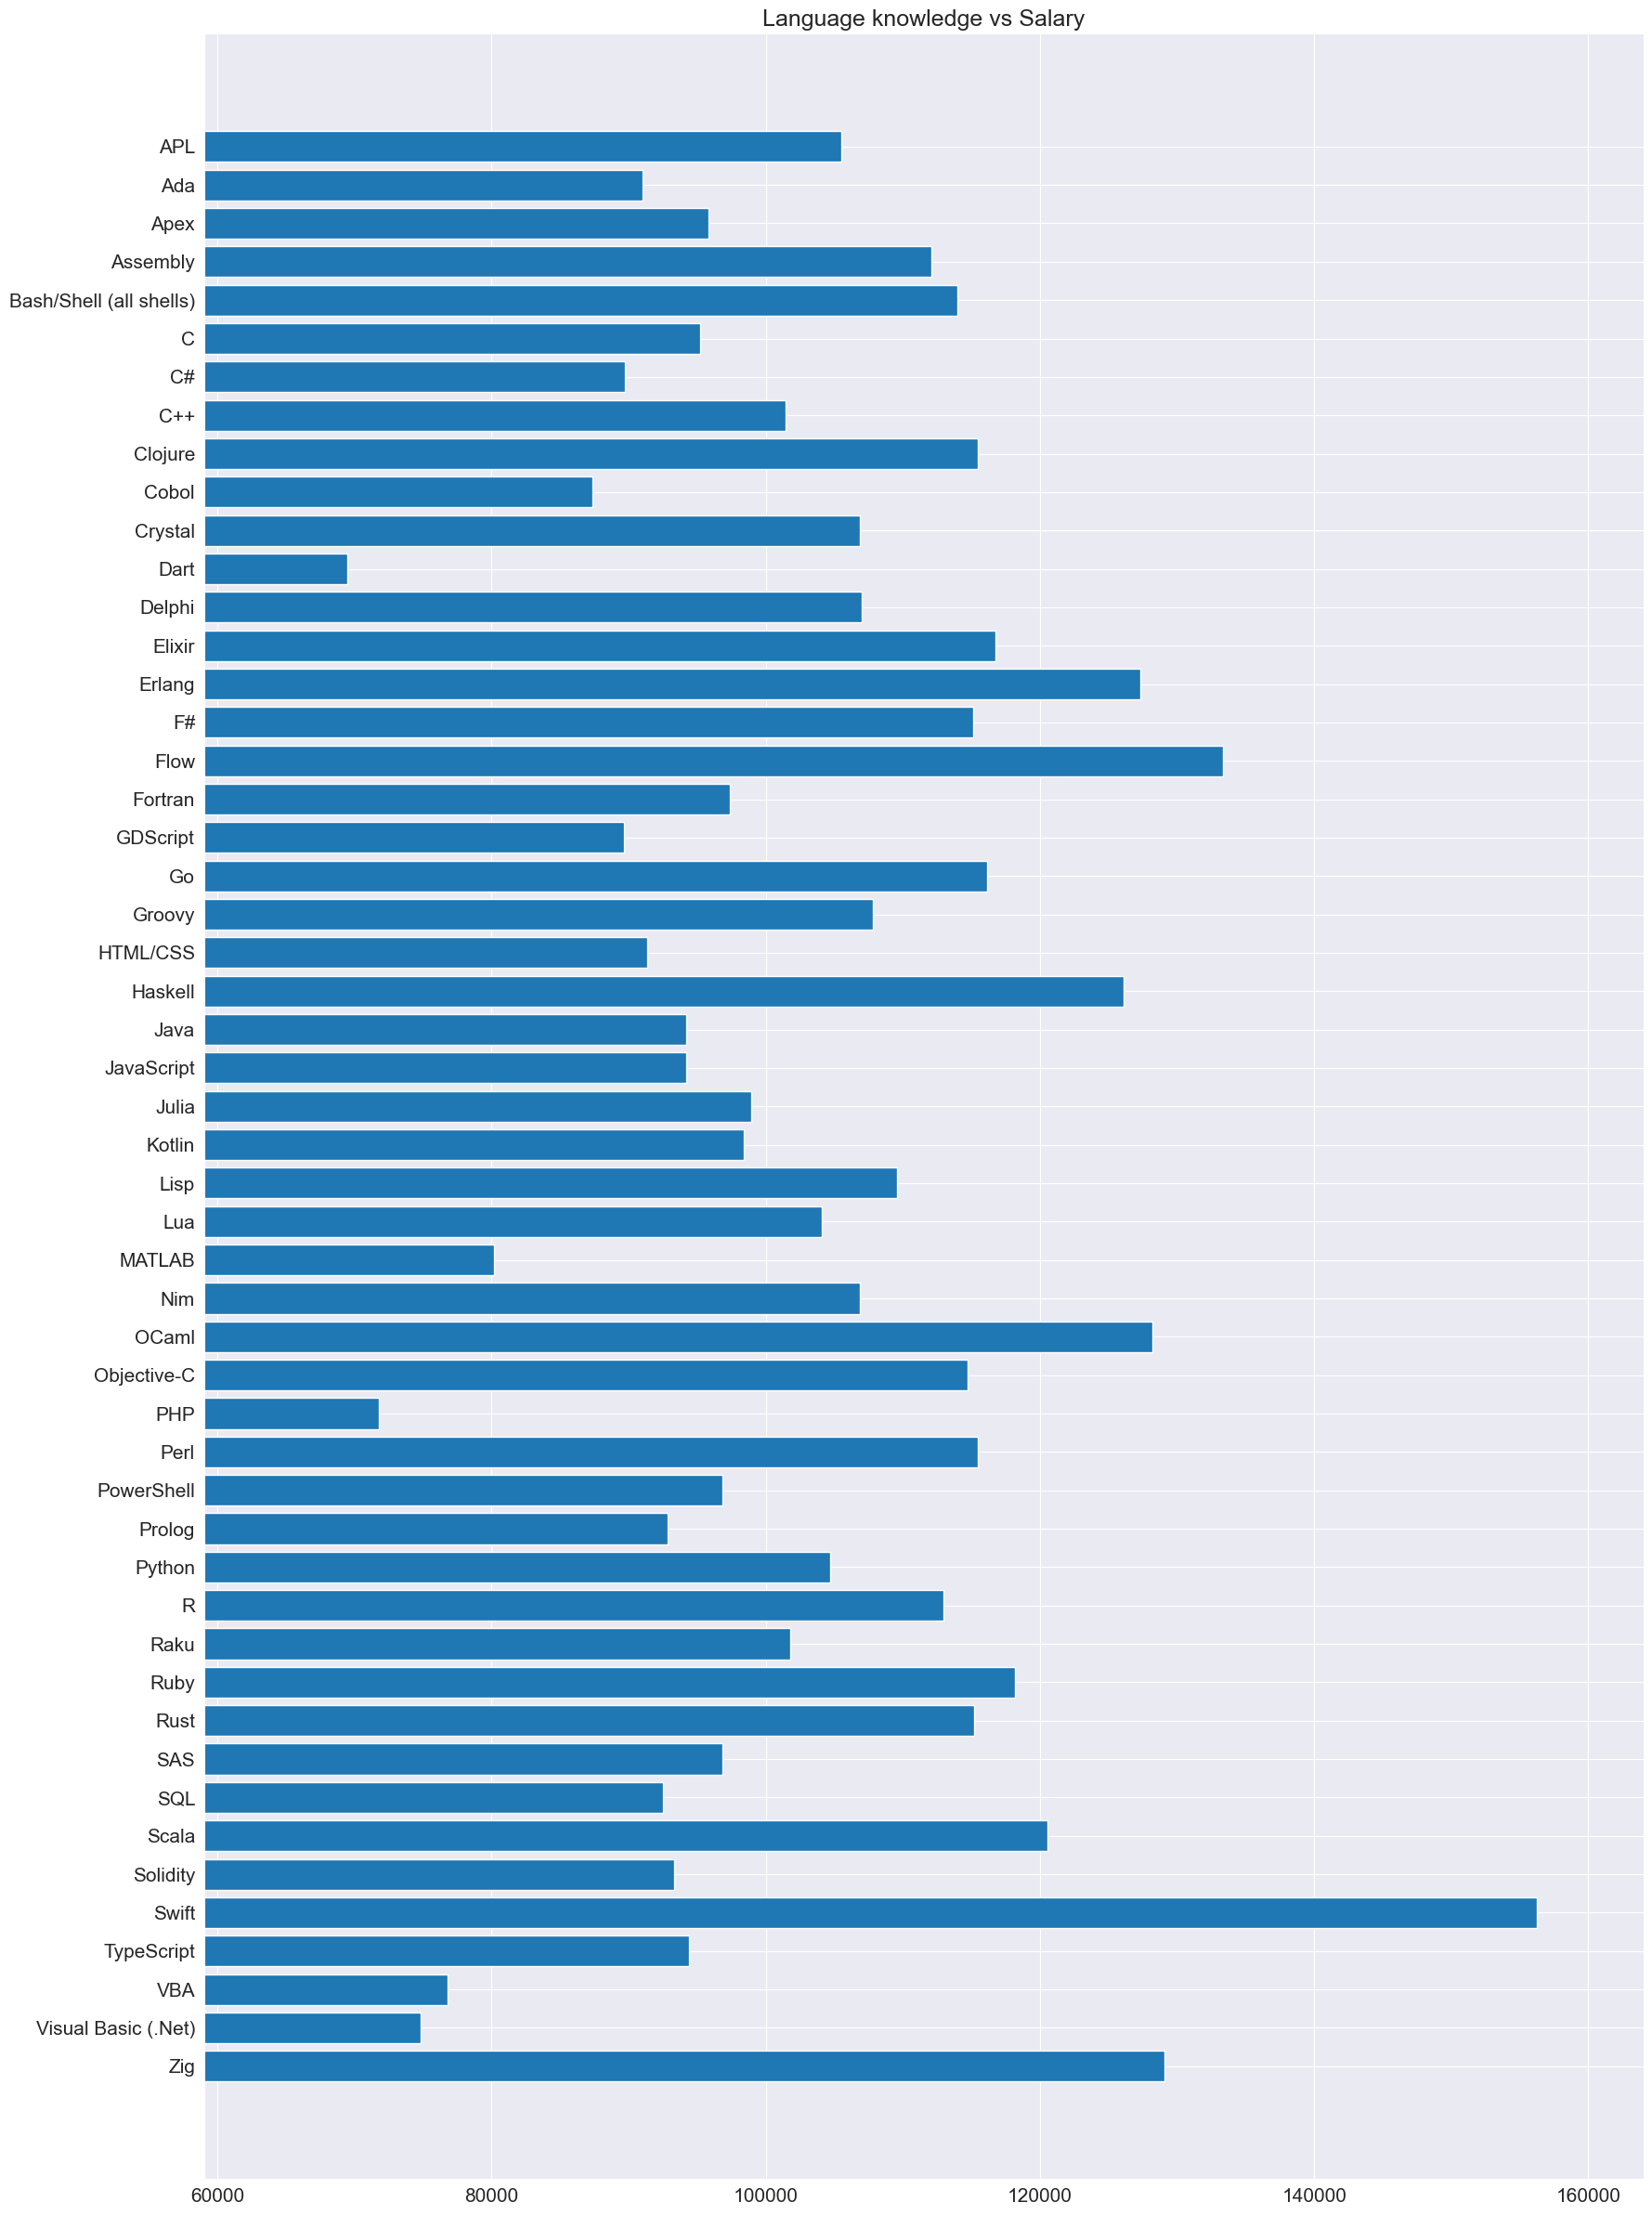

In [14]:
plt.rcParams['figure.figsize'] = [20, 30]
plt.rcParams.update({'font.size': 15})
plt.barh(y=salary_per_langue["Language"], width=salary_per_langue["mean"])
plt.title('Language knowledge vs Salary')
plt.xlim(9**5)
plt.show()

In [15]:
df2 = salary_per_langue.loc[["Python", "C++", "Java"]].copy()
df2.T.loc['mean'].sort_values(ascending=False)

Python    104708.299462
C++       101471.660934
Java       94205.404269
Name: mean, dtype: object

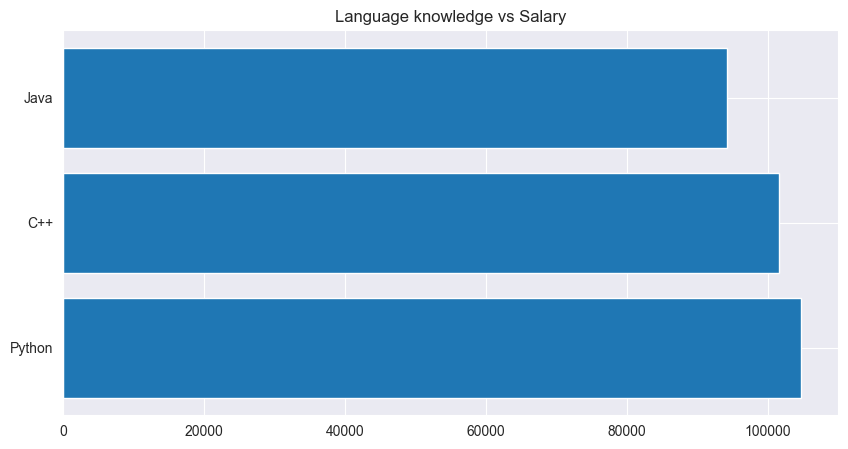

In [16]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 10})
plt.barh(y=df2["Language"], width=df2["mean"])
plt.title('Language knowledge vs Salary')
plt.show()

Групування заробітної плати за рівнем освіти у Series

In [17]:
df_ed_mean = df.loc[:, ['EdLevel', 'Salary']].copy()

In [18]:
df_ed_mean = df_ed_mean.groupby('EdLevel', observed=True)['Salary'].mean()
df_ed_mean

EdLevel
Associate degree (A.A., A.S., etc.)                                                    89284.977757
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                           96426.652817
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        94103.247791
Primary/elementary school                                                              88594.122137
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                        163316.412597
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     72553.480082
Some college/university study without earning a degree                                 86376.539429
Something else                                                                         69975.713846
Name: Salary, dtype: float64

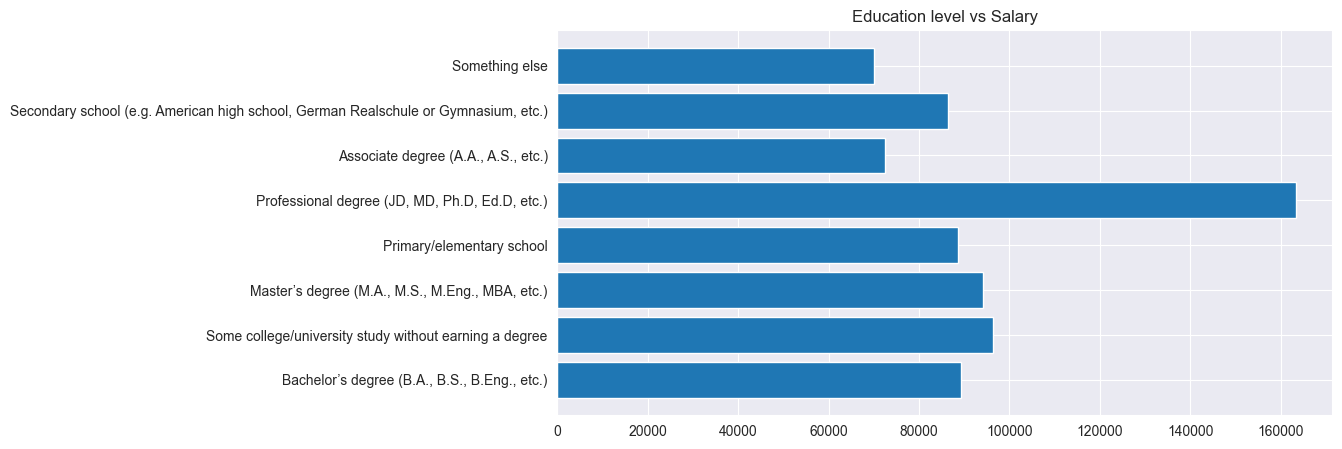

In [19]:
plt.rcParams.update({'font.size': 10})
plt.barh(y=df['EdLevel'].unique(), width=df_ed_mean)
plt.title('Education level vs Salary')
plt.show()

In [20]:
def ToFactor(org_df, new_df, col):
    labels, _ = pd.factorize(org_df[col])
    new_df.loc[:,[col]] = labels

df_mod =df[['WorkExp', 'Salary']].copy()
ToFactor(df, df_mod, "RemoteWork")
ToFactor(df, df_mod, "DevType")
ToFactor(df, df_mod, "EdLevel")
ToFactor(df, df_mod, "Country")

In [21]:
df_mod.dtypes

WorkExp       float64
Salary        float64
RemoteWork      int64
DevType         int64
EdLevel         int64
Country         int64
dtype: object

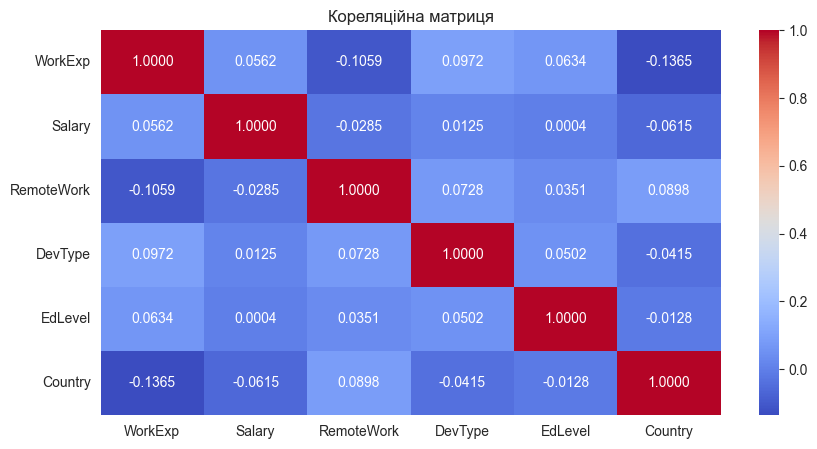

In [22]:
corr_matrix = df_mod.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Кореляційна матриця")
plt.show()

In [23]:
df_mod = df_mod.drop(['Country', 'RemoteWork'], axis=1)
df_mod

,WorkExp,Salary,DevType,EdLevel
ResponseId,,,,
2,10.0,285000.0,0,0
3,23.0,250000.0,1,0
4,7.0,156000.0,2,0
5,6.0,23456.0,3,0
6,22.0,96828.0,1,1
...,...,...,...,...
89163,25.0,50719.0,1,2
89167,3.0,16917.0,3,1
89168,2.0,15752.0,9,0


In [24]:
def ShowPlot(df, x_col, y_col, w=10, h=5):
    df.loc[:, [x_col]] = df.loc[:, [x_col]].astype('category')
    col_mean = df.groupby(x_col, observed=True)[y_col].mean()

    plt.rcParams['figure.figsize'] = [w, h]
    plt.barh(y=df[x_col].unique(), width=col_mean)
    plt.title(f'{x_col} vs {y_col}')
    plt.show()

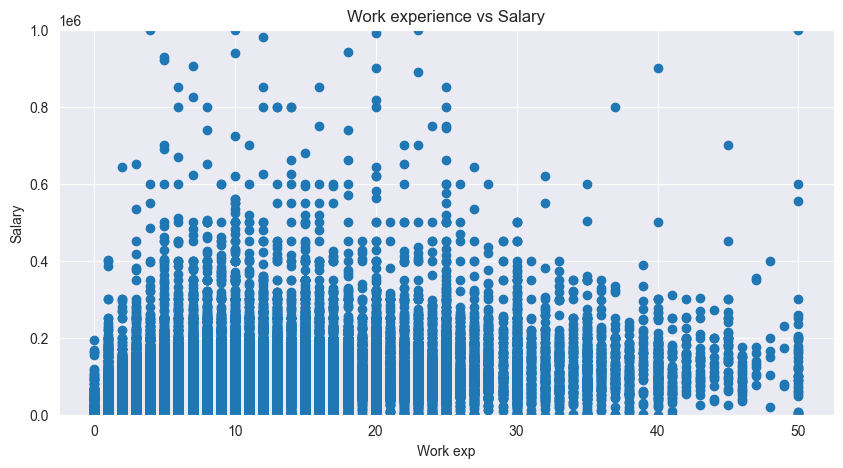

In [25]:
plt.rcParams.update({'font.size': 10})
plt.scatter(x=df_mod['WorkExp'], y=df_mod['Salary'])
plt.title('Work experience vs Salary')
plt.xlabel("Work exp")
plt.ylabel("Salary")
plt.ylim(0, 10**6)
plt.show()

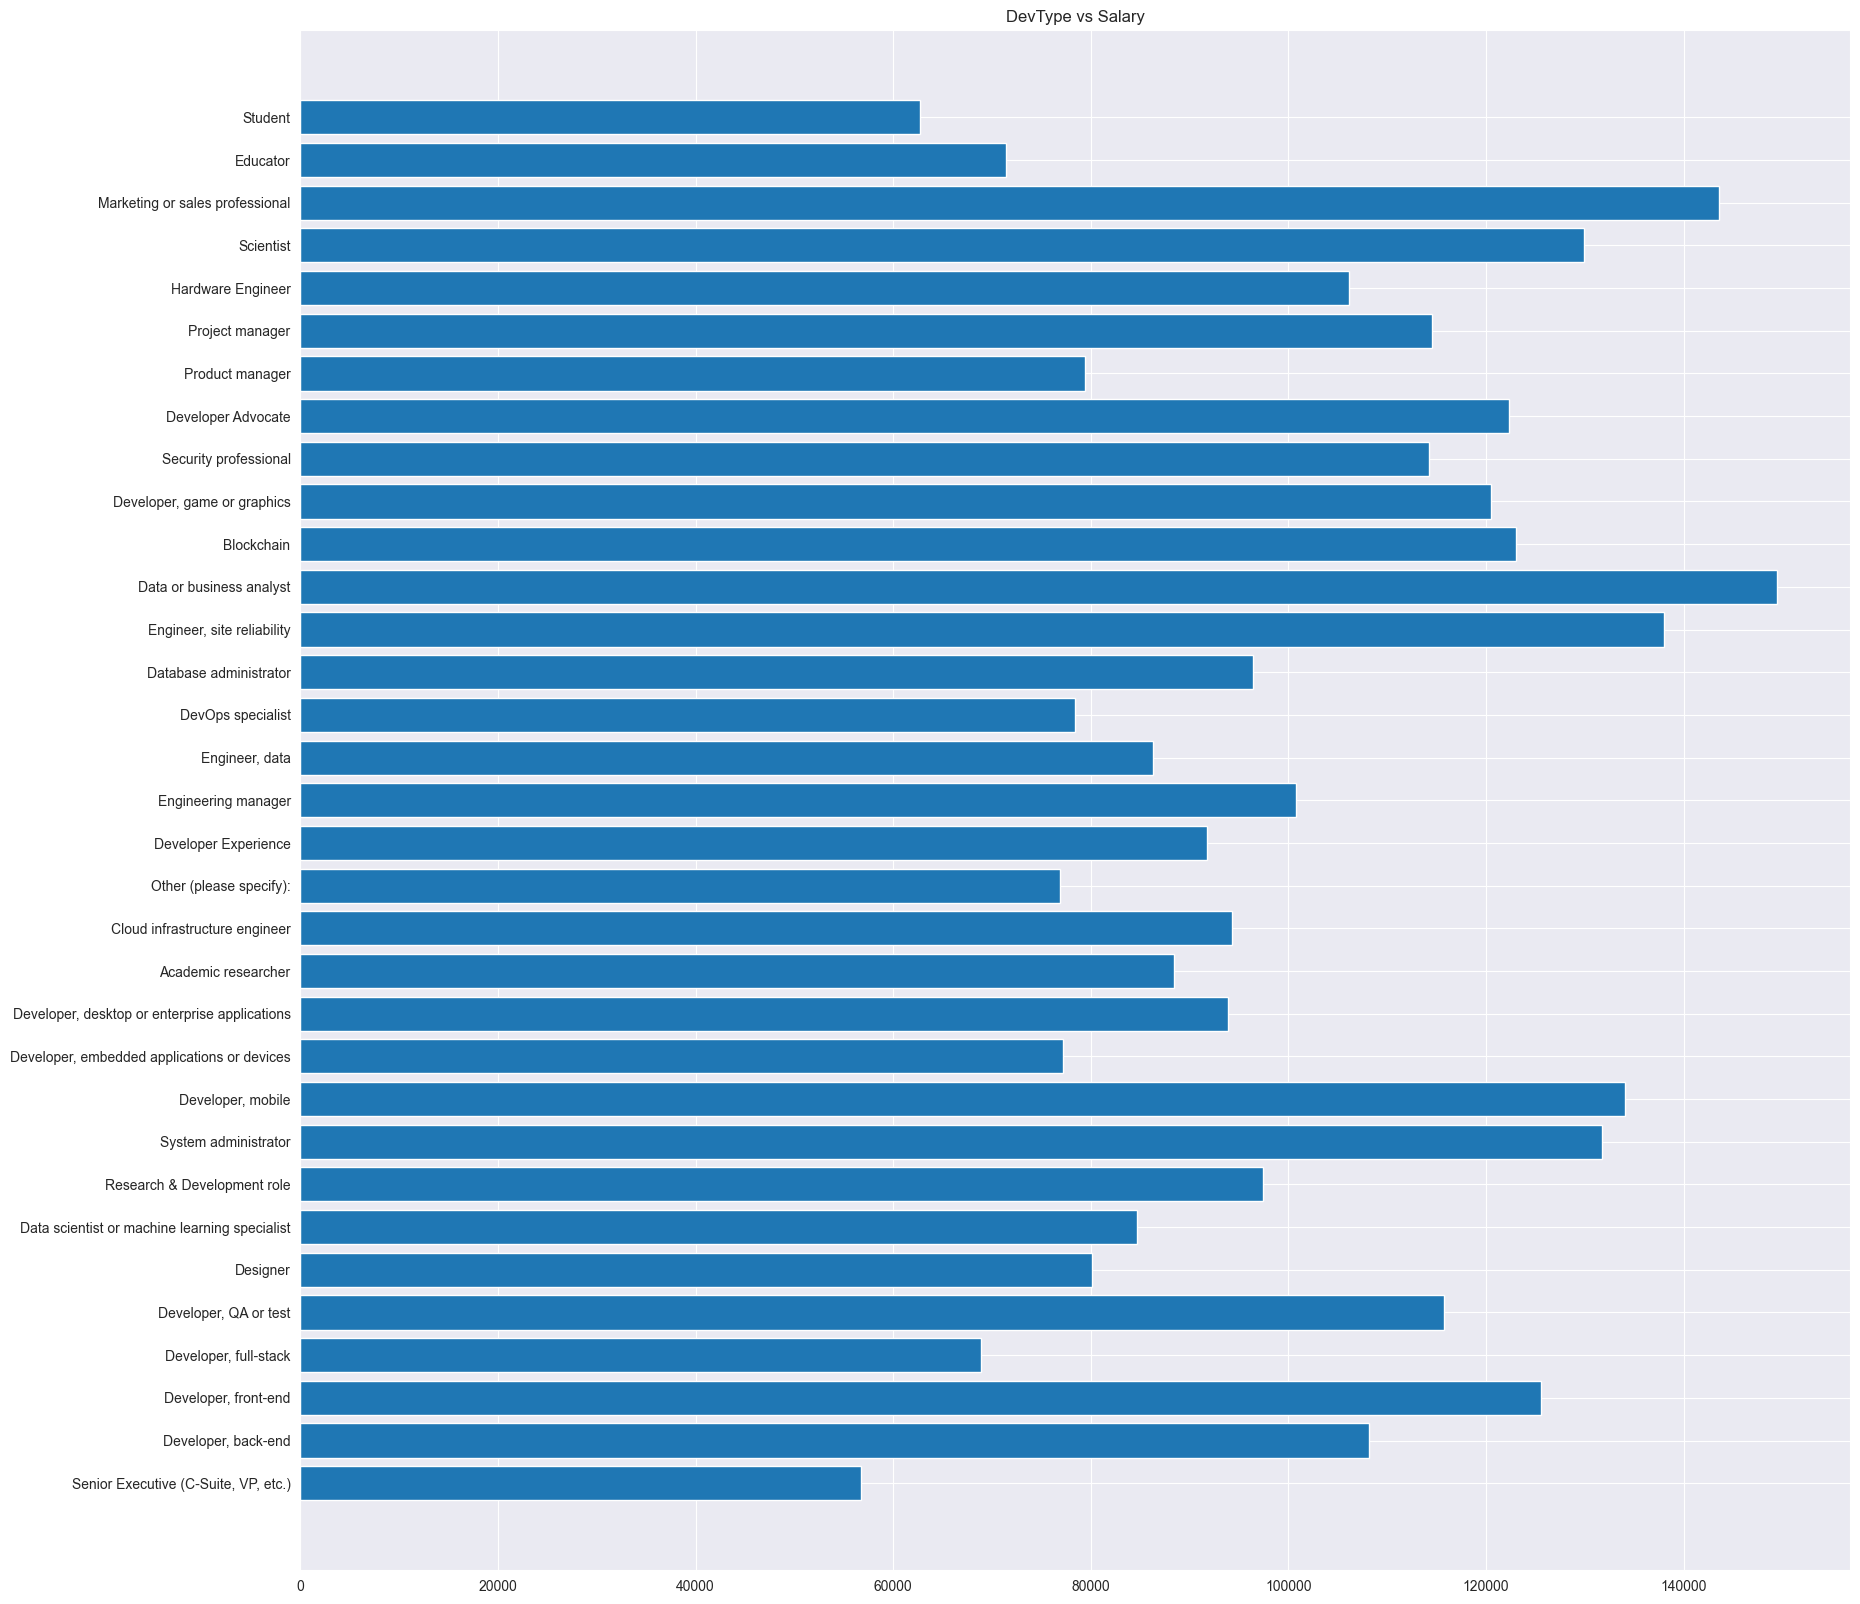

In [26]:
ShowPlot(df, 'DevType', 'Salary', 20, 20)

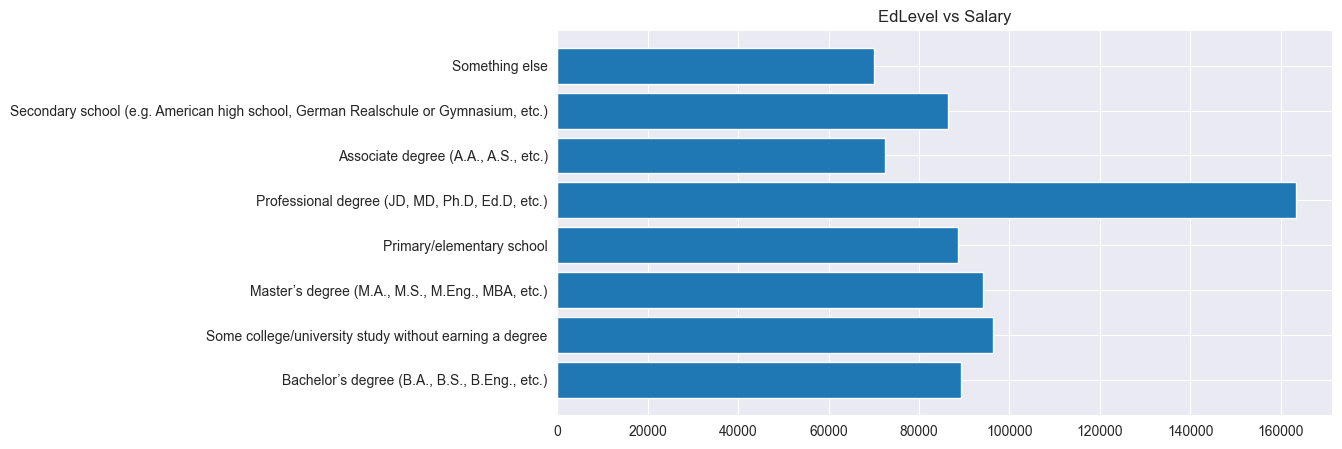

In [27]:
ShowPlot(df, 'EdLevel', 'Salary', 10, 5)

Прогнозування заробітної плати за стажем роботи за допомогою лінійної регресії

In [28]:
X = df_mod.loc[:, df_mod.columns != 'Salary']
Y = df_mod['Salary']

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.16284685, -0.94891054, -0.76917664],
       [ 1.31216789, -0.79496516, -0.76917664],
       [-0.50323487, -0.64101978, -0.76917664],
       ...,
       [-1.07054824,  0.43659787, -0.76917664],
       [-0.27630953,  1.20632477,  0.37696591],
       [-0.27630953, -0.4870744 ,  0.37696591]])

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=11)

In [31]:
X_train.shape

(24415, 3)

In [32]:
X_test.shape

(8139, 3)

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [34]:
lin_reg.coef_

array([26120.41188067,  4770.93192225, -5690.63467229])

In [35]:
lin_reg.intercept_

np.float64(93793.21943401791)

In [36]:
predicted = lin_reg.predict(X_test)
expected = Y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 54243.91, expected: 12000.00
predicted: 90046.45, expected: 200000.00
predicted: 77508.90, expected: 76000.00
predicted: 72341.82, expected: 150000.00
predicted: 87843.06, expected: 50675.00
predicted: 95353.10, expected: 36946.00
predicted: 94049.58, expected: 45931.00
predicted: 76127.86, expected: 36255.00
predicted: 114707.54, expected: 70634.00
predicted: 143532.47, expected: 204000.00
predicted: 64919.67, expected: 60000.00
predicted: 111229.31, expected: 155394.00
predicted: 70086.75, expected: 10636.00
predicted: 69378.13, expected: 117931.00
predicted: 97825.26, expected: 40840.00
predicted: 132463.85, expected: 850000.00
predicted: 97520.28, expected: 120000.00
predicted: 88034.31, expected: 53545.00
predicted: 138391.23, expected: 280000.00
predicted: 129823.44, expected: 92939.00
predicted: 117428.30, expected: 132000.00
predicted: 71974.38, expected: 55687.00
predicted: 85613.83, expected: 75000.00
predicted: 84931.05, expected: 225000.00
predicted: 139011.96, e

Обчислення середньоквадратичної похибки

In [37]:
mean_squared_error(Y_test, predicted)

698048370868.4722

Обчислення R^2

In [38]:
r2_score(Y_test, predicted)

4.6590932049728195e-05

In [39]:
plt.rcParams['figure.figsize'] = [10, 5]

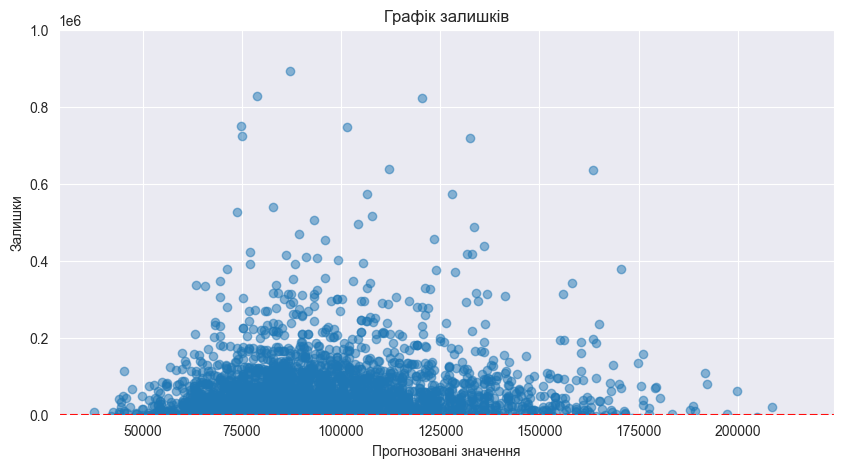

In [40]:
residuals = Y_test - predicted
plt.scatter(predicted, residuals, alpha=0.5)
plt.xlabel('Прогнозовані значення')
plt.ylabel('Залишки')
plt.title('Графік залишків')
plt.axhline(y=0, color='red', linestyle='--')
plt.ylim(0, 10**6)
plt.show()

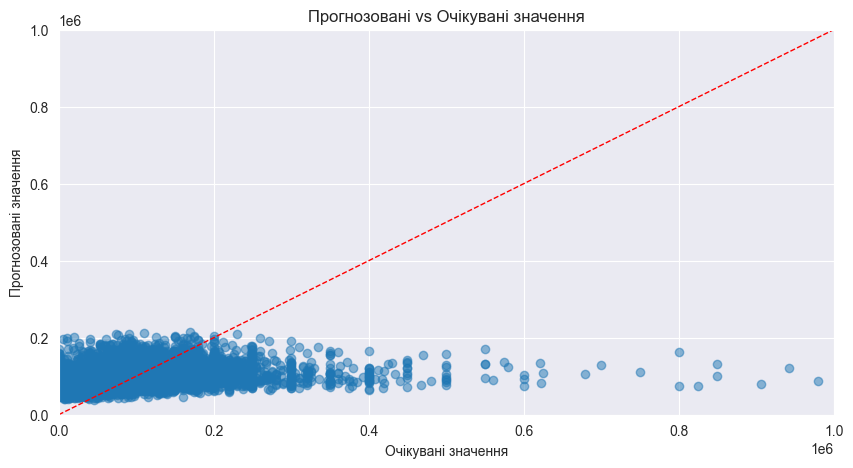

In [41]:
plt.scatter(Y_test, predicted, alpha=0.5)
plt.xlabel('Очікувані значення')
plt.ylabel('Прогнозовані значення')
plt.title('Прогнозовані vs Очікувані значення')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=1)
plt.xlim(0, 10**6)
plt.ylim(0, 10**6)
plt.show()

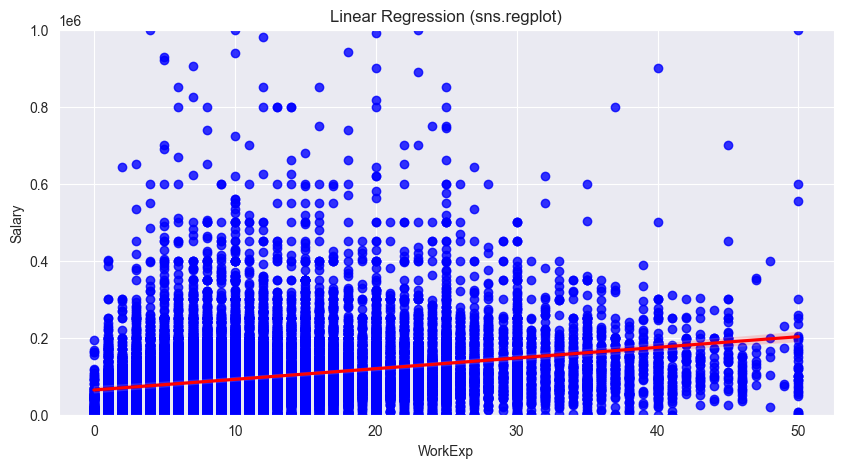

In [42]:
axes = sns.regplot(x=df_mod.WorkExp, y=df_mod.Salary, data=df_mod, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Linear Regression (sns.regplot)")
plt.ylim(0, 10**6)
plt.show()

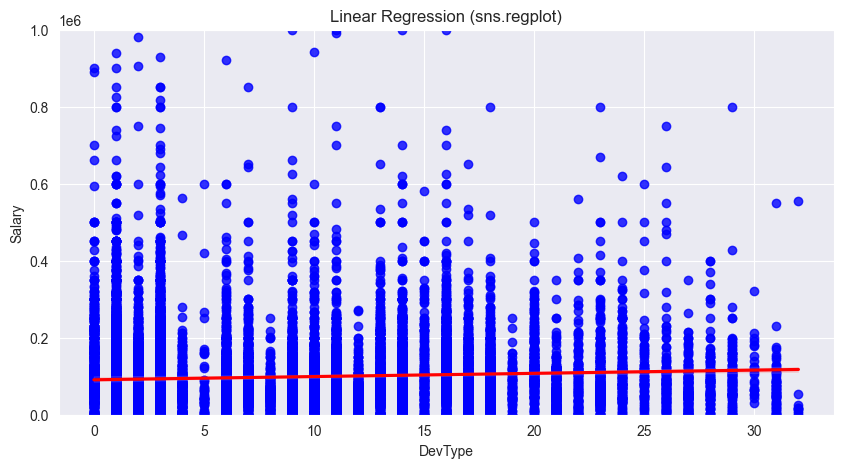

In [43]:
axes = sns.regplot(x=df_mod.DevType, y=df_mod.Salary, data=df_mod, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Linear Regression (sns.regplot)")
plt.ylim(0, 10**6)
plt.show()

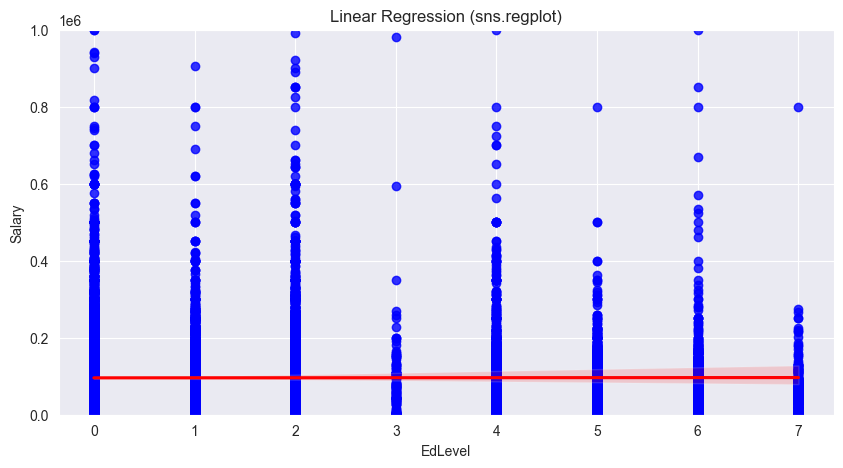

In [44]:
axes = sns.regplot(x=df_mod.EdLevel, y=df_mod.Salary, data=df_mod, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Linear Regression (sns.regplot)")
plt.ylim(0, 10**6)
plt.show()